In [ ]:
# -*- coding: utf-8 -*-

#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SimpleRNN, GRU, BatchNormalization, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


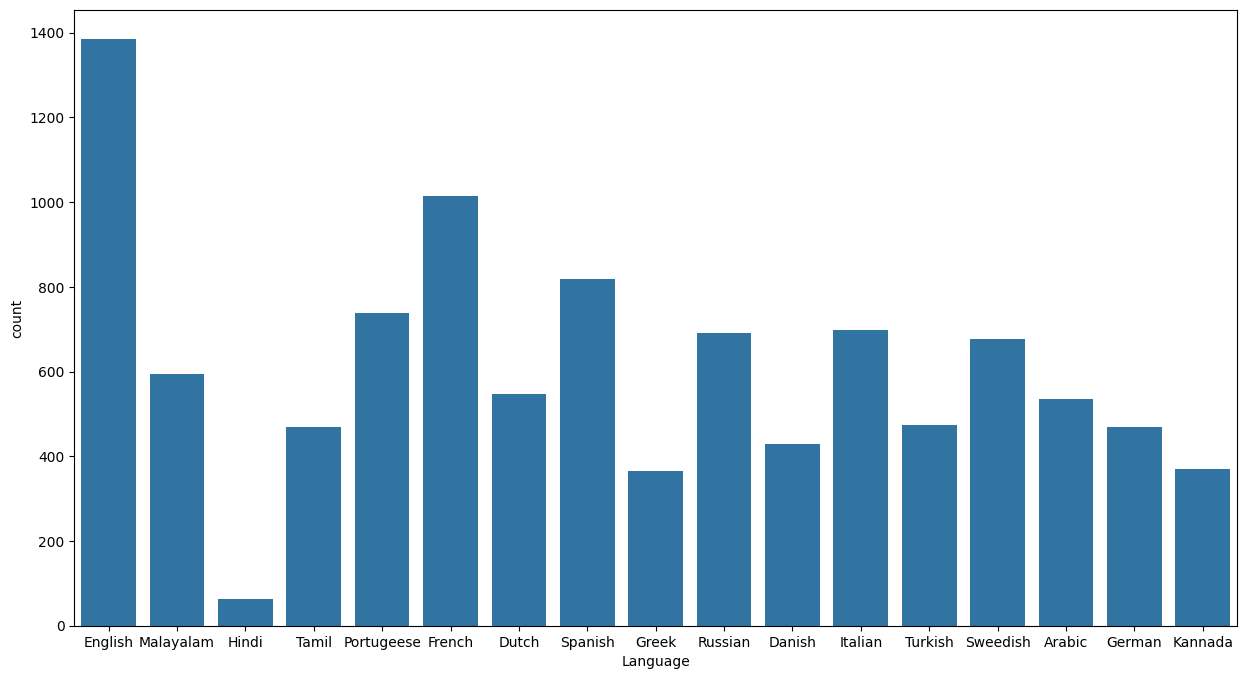

Missing rows count: 
Text        0
Language    0
dtype: int64
Duplicated rows count: 
66
Label Distributions: Counter({'English': 1385, 'French': 1014, 'Spanish': 819, 'Portugeese': 739, 'Italian': 698, 'Russian': 692, 'Sweedish': 676, 'Malayalam': 594, 'Dutch': 546, 'Arabic': 536, 'Turkish': 474, 'German': 470, 'Tamil': 469, 'Danish': 428, 'Kannada': 369, 'Greek': 365, 'Hindi': 63})


In [ ]:
"""
Acquire & Preprocess Data
"""

#Change this to whatever directory the dataset is found in
df = pd.read_csv('/content/gdrive/MyDrive/COMP 550 - Final Project/Datasets/Language Detection.csv')

#Plot data
plt.figure(figsize = (15, 8))
sns.countplot(x = df['Language'])
plt.show()


texts = df['Text']
languages = df['Language']


#Check missing values and drop if there is any
print(f'Missing rows count: \n{df.isnull().sum()}')


df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)


#Check duplicated rows and drop if there is any
print(f'Duplicated rows count: \n{df.duplicated().sum()}')


df.drop_duplicates(inplace=True)


from collections import Counter
print(f"Label Distributions: {Counter(languages)}")


texts = df['Text']
languages = df['Language']


word_list = []


#Remove special characters and numbers
for word in texts:
 word = re.sub(r'[!@#$(),"%^*?:;~`0-9]', '', word)
 word = re.sub(r'[[]]', '', word)
 word = word.lower()
 word_list.append(word)

#Tf-idf vectorization
tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
X_tfidf = tfidf_vectorizer.fit_transform(word_list)

In [ ]:
#Visual of the dataframe
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
"""
We will now start the process of training additional the models
"""

languages_array = np.array(languages)


results = {}


label_encoder = LabelEncoder()
label_encoder.fit(languages)
languages_array = label_encoder.transform(languages)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Multinomial Logistic Regression Accuracy: 0.9849148418491485

Multinomial Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       0.98      0.95      0.96        85
           2       1.00      0.96      0.98       100
           3       0.98      1.00      0.99       280
           4       0.99      0.99      0.99       210
           5       0.98      0.99      0.98        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        15
           8       0.97      0.99      0.98       145
           9       1.00      1.00      1.00        71
          10       1.00      1.00      1.00       120
          11       0.99      0.97      0.98       146
          12       0.97      0.99      0.98       147
          13       0.97      0.97      0.97       155
          14       0.98      0.98      0.98       133
          15      

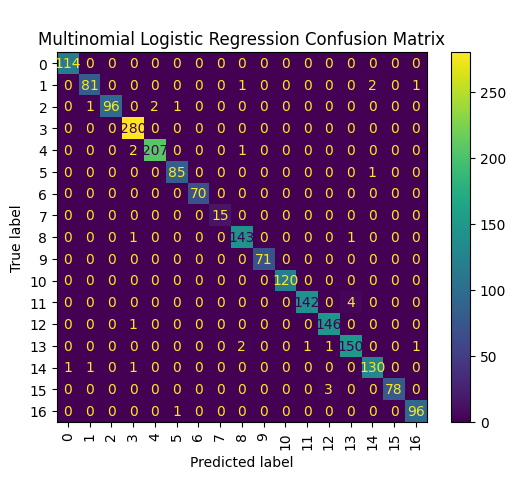

In [ ]:
"""
# -------------------
# Multinomial Logistic Regression
# -------------------
"""

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, languages_array, test_size=0.2, random_state=11)

#Create and train the model
lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
lr_model.fit(X_train, y_train)

#Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"\nMultinomial Logistic Regression Accuracy: {lr_accuracy}")

print("\nMultinomial Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

confusionMatrix_lr = confusion_matrix(y_test, y_pred_lr)
ConfusionMatrixDisplay(confusionMatrix_lr, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis', xticks_rotation='vertical')
plt.title(f"\nMultinomial Logistic Regression Confusion Matrix")
plt.show()

# -------------------
# Model Performance Summary
# -------------------
# Test Accuracy: 0.9849
# Notes:
# - Overall accuracy: 98.49%, showcasing excellent performance for the Multinomial Logistic Regression model.
# - Strengths: No drop-offs really

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 1 accuracy: 0.9849148418491485


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 2 accuracy: 0.9868549172346641


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 3 accuracy: 0.9902629016553067


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 4 accuracy: 0.9810126582278481


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Fold 5 accuracy: 0.9839337877312561

Multinomial Linear Regression Cross-validation results:
Mean accuracy of all folds: 0.9853958213396445
Standard deviation of accuracy of all folds: 0.003078910003131549

Multinomial Logistic Regression Classification Report for fold 1:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       114
           1       0.98      0.95      0.96        85
           2       1.00      0.96      0.98       100
           3       0.98      1.00      0.99       280
           4       0.99      0.99      0.99       210
           5       0.98      0.99      0.98        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        15
           8       0.97      0.99      0.98       145
           9       1.00      1.00      1.00        71
          10       1.00      1.00      1.00       120
          11       0.99      0.97      0.98       146
          12       0.97 

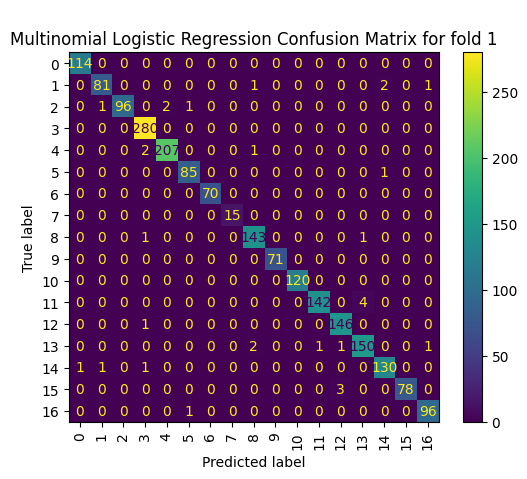

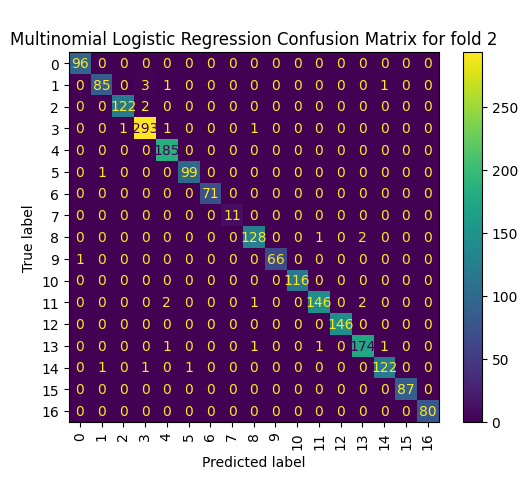

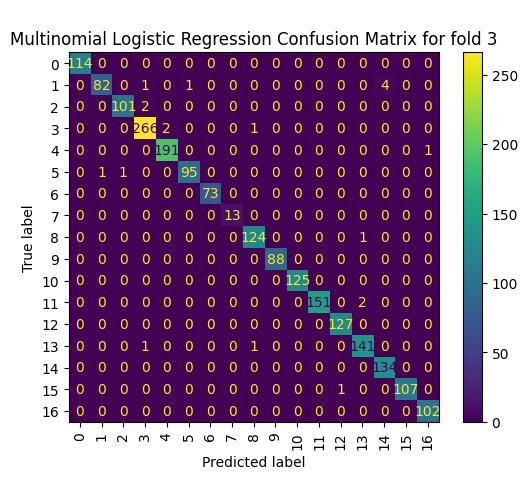

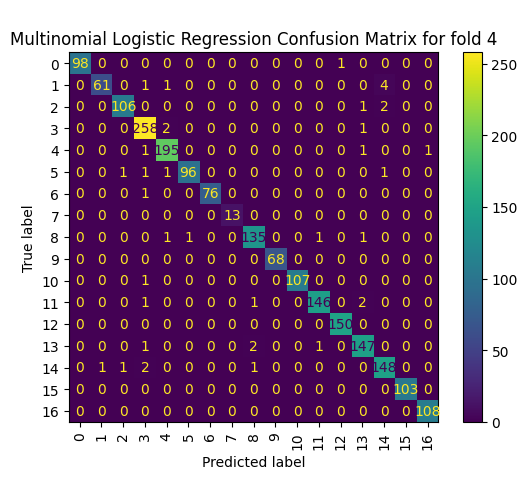

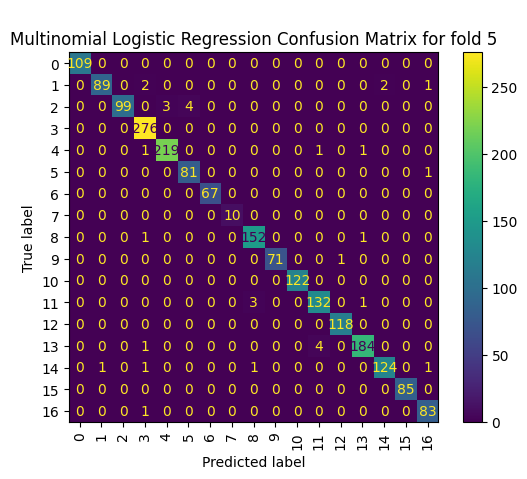

In [ ]:
"""
# -------------------
# Multinomial Logistic Regression with kfold (k = 5) Cross-Validation
# -------------------
"""

#5fold cross-validation here
kfold = KFold(n_splits=5, shuffle=True, random_state=11) #We shuffle the data as it is ordered based on language and we don't want folds to be hyper concentrated on a single language

#Lists to store metrics
all_accuracies = []
all_confusion_matrices = []
all_classification_reports = []

#k-fold (k = 5) cross-validation
for fold, (train_set, test_set) in enumerate(kfold.split(X_tfidf)):

    #Creating training and test data
    X_train, X_test = X_tfidf[train_set], X_tfidf[test_set]
    y_train, y_test = languages_array[train_set], languages_array[test_set]

    #Training
    lrcv_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    lrcv_model.fit(X_train, y_train)

    #Predictions
    lrcv_y_pred = lrcv_model.predict(X_test)

    acc = accuracy_score(y_test, lrcv_y_pred)
    all_accuracies.append(acc)

    #Classification Reports
    lrcv_classificationReport = classification_report(y_test, lrcv_y_pred)
    all_classification_reports.append(lrcv_classificationReport)

    #Confusion matrices
    lrcv_confusionMatrix = confusion_matrix(y_test, lrcv_y_pred)
    all_confusion_matrices.append(lrcv_confusionMatrix)

    print(f"Fold {fold + 1} accuracy: {acc}")
    # Accuracy for Fold 1: 0.9849
    # Accuracy for Fold 2: 0.9869
    # Accuracy for Fold 3: 0.9903
    # Accuracy for Fold 4: 0.9810
    # Accuracy for Fold 5: 0.9839

#Print summary of results
# Mean Accuracy of all folds: 0.9854
# Standard Deviation of Accuracy: 0.0031
print("\nMultinomial Linear Regression Cross-validation results:")
print(f"Mean accuracy of all folds: {np.mean(all_accuracies)}")
print(f"Standard deviation of accuracy of all folds: {np.std(all_accuracies)}")

#Print all classification reports for each fold
for i, report in enumerate(all_classification_reports):
    print(f"\nMultinomial Logistic Regression Classification Report for fold {i + 1}:")
    print(report)

#Print all confusion matrices for each fold
for i, matrix in enumerate(all_confusion_matrices):
    ConfusionMatrixDisplay(matrix, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis', xticks_rotation='vertical')
    plt.title(f"\nMultinomial Logistic Regression Confusion Matrix for fold {i + 1}")
    plt.show()


Random Forest Accuracy: 0.9635036496350365

Random Forest Classifier Report
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       114
           1       0.90      0.91      0.90        85
           2       0.98      0.94      0.96       100
           3       0.98      0.99      0.98       280
           4       0.98      0.97      0.98       210
           5       0.95      0.98      0.97        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        15
           8       0.97      0.95      0.96       145
           9       1.00      1.00      1.00        71
          10       1.00      0.98      0.99       120
          11       0.93      0.94      0.93       146
          12       1.00      1.00      1.00       147
          13       0.93      0.90      0.91       155
          14       0.95      0.94      0.95       133
          15       1.00      0.96      0.98        81
    

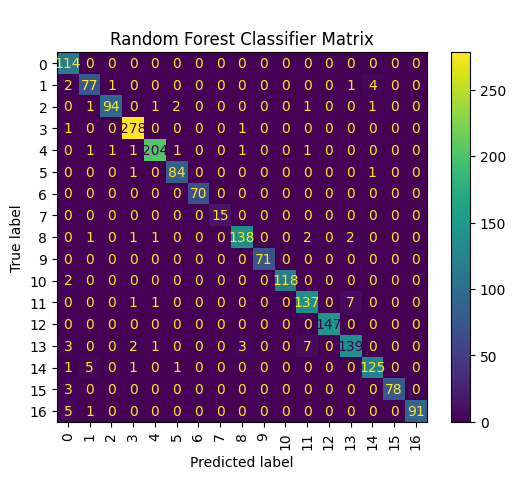

1. o  (0.006392)
2. th (0.006311)
3. t  (0.006157)
4. the (0.004749)
5. he (0.004663)
6. s  (0.004337)
7. d  (0.004295)
8.  th (0.004255)
9. he  (0.003620)
10. e  (0.003442)


In [ ]:
"""
# -------------------
# Random Forest
# -------------------
"""

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, languages_array, test_size=0.2, random_state=11)

#Create and train the model
RandomForestModel = RandomForestClassifier(n_estimators=100,
                            random_state=11,
                            bootstrap=True)

RandomForestModel.fit(X_train, y_train)

#Make predictions
y_pred_rf = RandomForestModel.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy}")

print("\nRandom Forest Classifier Report")
print(classification_report(y_test, y_pred_rf))

confusionMatrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusionMatrix_rf, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis', xticks_rotation='vertical')
plt.title(f"\nRandom Forest Classifier Matrix")
plt.show()

#Getting most important features
featureImportances = RandomForestModel.feature_importances_
featureNames = tfidf_vectorizer.get_feature_names_out()
indices = np.argsort(featureImportances)[::-1]
for f in range(10):  #Top 10 features
    print("%d. %s (%f)" % (f + 1, featureNames[indices[f]], featureImportances[indices[f]]))


# Model Performance Summary

# Random Forest Accuracy: 0.9635
# Notes:
# - Overall accuracy: 96.35%, showing strong performance.
# - Precision, recall, and F1-scores are high for most classes, particularly for classes 6, 7, 9, 10, and 12.
# - Minor drops in precision and recall for classes like 1, 11, 13, and 14.
# - The model shows excellent performance with macro and weighted averages close to 0.96-0.97.


In [ ]:
#Hyperparameter Tuning to find the best Random Forest Model
parameters = {
    'n_estimators': [150, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Hyperparameter Tuning with 2-fold Cross-Fold validation (k = 2)
#2-fold was done because of the dataset and computational limits
search = GridSearchCV(RandomForestClassifier(random_state=11), parameters, cv=2, verbose=3)
search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)
print("Best cross-validation score:".format(search.best_score_))

Fitting 2 folds for each of 72 candidates, totalling 144 fits
[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.962 total time=  20.8s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.963 total time=  17.4s
[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.965 total time=  25.0s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.962 total time=  25.2s
[CV 1/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.971 total time=  12.7s
[CV 2/2] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.964 total time=  12.8s
[CV 1/2]

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       114
           1       0.92      0.94      0.93        85
           2       0.98      0.95      0.96       100
           3       0.98      0.99      0.99       280
           4       0.98      0.99      0.98       210
           5       0.95      0.97      0.96        86
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        15
           8       0.96      0.98      0.97       145
           9       1.00      1.00      1.00        71
          10       1.00      1.00      1.00       120
          11       0.98      0.96      0.97       146
          12       1.00      1.00      1.00       147
          13       0.95      0.92      0.93       155
          14       0.98      0.94      0.96       133
          15       1.00      0.98      0.99        81
          16       0.96      1.00      0.98        97

    accuracy              

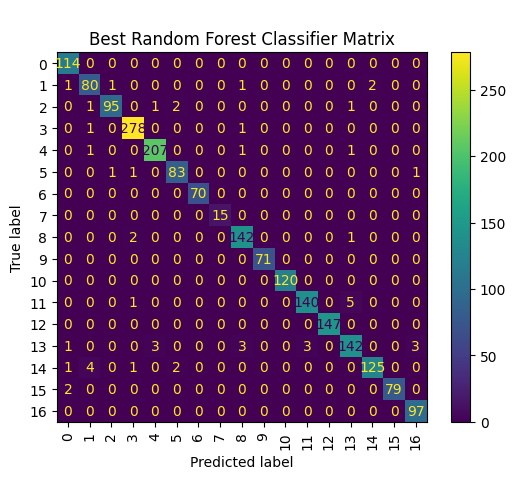

1. th (0.008561)
2. o  (0.007393)
3.  th (0.007109)
4. the (0.006958)
5. s  (0.005515)
6. t  (0.005156)
7. i  (0.004378)
8. y  (0.004153)
9. ou (0.004092)
10. ão (0.004006)


In [ ]:
#Making Predictions using the best parameters after hypertuning
BestRandomForestClassifier = search.best_estimator_
y_pred_bestrf = BestRandomForestClassifier.predict(X_test)

#Classification Report and Confusion Matrix
print(classification_report(y_test, y_pred_bestrf))

confusionMatrix_bestrf = confusion_matrix(y_test, y_pred_bestrf)
ConfusionMatrixDisplay(confusionMatrix_bestrf, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis', xticks_rotation='vertical')
plt.title(f"\nBest Random Forest Classifier Matrix")
plt.show()

#Getting most important features for the Best model
featureImportances = BestRandomForestClassifier.feature_importances_
featureNames = tfidf_vectorizer.get_feature_names_out()
indices = np.argsort(featureImportances)[::-1]
for f in range(10):  #Top 10 features
    print("%d. %s (%f)" % (f + 1, featureNames[indices[f]], featureImportances[indices[f]]))

# Model Performance Summary
# Best Random Forest Accuracy: 0.98
# Notes:
# - Overall accuracy: 98%, showing a slight improvement after hyperparameter tuning.
# - Precision, Recall, and F1-Scores for key classes (e.g., 6, 9, 10, 12, 15) are perfect (1.00).
# - Minor improvements observed for underperforming classes like 1 and 13 compared to the default Random Forest.
# - The model achieves excellent macro and weighted average scores of 0.98.

In [ ]:
#Preparing data for other machine learning models that need tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(word_list)
X_seq = tokenizer.texts_to_sequences(word_list)

#X values
X_seq = pad_sequences(X_seq, maxlen=100)

label_encoder = LabelEncoder()
languages_encoded = label_encoder.fit_transform(languages)

#y values
languages_array = np.array(languages_encoded)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.2003 - loss: 2.5327 - val_accuracy: 0.6411 - val_loss: 1.3080 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.8389 - loss: 0.8276 - val_accuracy: 0.8948 - val_loss: 0.5102 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.9603 - loss: 0.2624 - val_accuracy: 0.9355 - val_loss: 0.2890 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.9749 - loss: 0.1317 - val_accuracy: 0.9434 - val_loss: 0.2326 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.9814 - loss: 0.0890 - val_accuracy: 0.9361 - val_loss: 0.2252 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9839 - loss: 0.0744 - val_accuracy: 0.9513 - val_loss: 0.1968 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.9856 - l

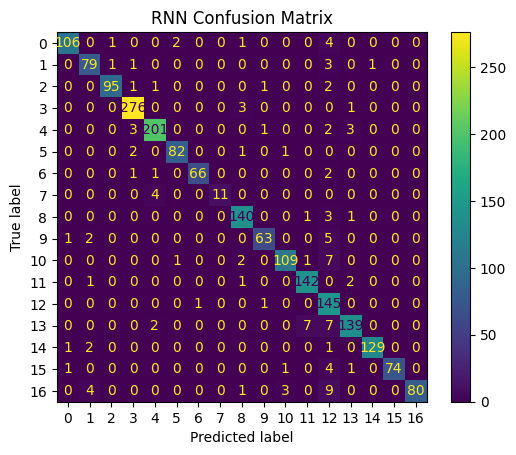

RNN Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       114
           1       0.90      0.93      0.91        85
           2       0.98      0.95      0.96       100
           3       0.97      0.99      0.98       280
           4       0.96      0.96      0.96       210
           5       0.96      0.95      0.96        86
           6       0.99      0.94      0.96        70
           7       1.00      0.73      0.85        15
           8       0.94      0.97      0.95       145
           9       0.95      0.89      0.92        71
          10       0.96      0.91      0.93       120
          11       0.94      0.97      0.96       146
          12       0.75      0.99      0.85       147
          13       0.95      0.90      0.92       155
          14       0.99      0.97      0.98       133
          15       1.00      0.91      0.95        81
          16       1.00      0.82      0.90        97



In [ ]:
"""
# -------------------
# Basic RNN
# -------------------
"""

#Splitting the data
# X_seq contains sequence data prepared for RNN input
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
# This dynamically reduces the learning rate after 10 epochs
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
# Stop training if validation loss doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
RNNmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    SimpleRNN(64, return_sequences=False),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
RNNmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
RNNmodel.summary()

#Train the model
history = RNNmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = RNNmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_RNN = np.argmax(RNNmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixRNN = confusion_matrix(y_test, y_pred_RNN)
ConfusionMatrixDisplay(confusionMatrixRNN, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("RNN Confusion Matrix")
plt.show()


#RNN Classification Report
print("RNN Classification Report")
print(classification_report(y_test, y_pred_RNN, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9424
# Notes:
# - Overall accuracy: 94.24%, showing good performance for an RNN model.
# - High precision, recall, and F1-scores for most classes, particularly 0, 3, 4, 6, 8, 14.
# - Class 7 (support = 15) and class 12 show some weaknesses, likely due to class imbalance.
# - The model generalizes well, but a more complex architecture like LSTM/BiLSTM might further improve performance.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step - accuracy: 0.2909 - loss: 2.3827 - val_accuracy: 0.8911 - val_loss: 0.5547 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step - accuracy: 0.9431 - loss: 0.3160 - val_accuracy: 0.9556 - val_loss: 0.2018 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.9810 - loss: 0.1036 - val_accuracy: 0.9623 - val_loss: 0.1618 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.9850 - loss: 0.0695 - val_accuracy: 0.9544 - val_loss: 0.1728 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 37s 180ms/step - accuracy: 0.9853 - loss: 0.0577 - val_accuracy: 0.9611 - val_loss: 0.1530 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.9814 - loss: 0.0638 - val_accuracy: 0.9641 - val_loss: 0.1489 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 33s 144ms/step - accuracy: 0.9

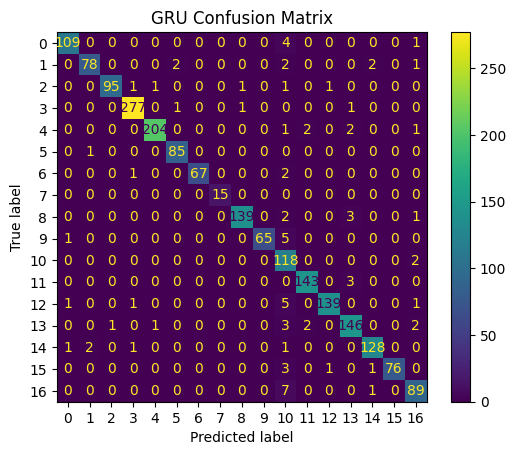

GRU Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       114
           1       0.96      0.92      0.94        85
           2       0.99      0.95      0.97       100
           3       0.99      0.99      0.99       280
           4       0.99      0.97      0.98       210
           5       0.97      0.99      0.98        86
           6       1.00      0.96      0.98        70
           7       1.00      1.00      1.00        15
           8       0.99      0.96      0.97       145
           9       1.00      0.92      0.96        71
          10       0.77      0.98      0.86       120
          11       0.97      0.98      0.98       146
          12       0.99      0.95      0.97       147
          13       0.94      0.94      0.94       155
          14       0.97      0.96      0.97       133
          15       1.00      0.94      0.97        81
          16       0.91      0.92      0.91        97



In [ ]:
"""
# -------------------
# Basic GRU
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
GRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    GRU(64, return_sequences=False),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
GRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
GRUmodel.summary()

#Train the model
history = GRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = GRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_GRU = np.argmax(GRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixGRU = confusion_matrix(y_test, y_pred_GRU)
ConfusionMatrixDisplay(confusionMatrixGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("GRU Confusion Matrix")
plt.show()


#RNN Classification Report
print("GRU Classification Report")
print(classification_report(y_test, y_pred_GRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))


# Model Performance Summary
# Test Accuracy: 0.9601
# - Overall accuracy: 96.01%, indicating strong generalization for the GRU model.
# - High precision, recall, and F1-scores achieved for most classes.
# - Top-performing classes: 3, 7, 8, 11, 12, and 13 with near-perfect precision and recall.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - accuracy: 0.2598 - loss: 2.3716 - val_accuracy: 0.8710 - val_loss: 0.7090 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 60s 293ms/step - accuracy: 0.9179 - loss: 0.4649 - val_accuracy: 0.9507 - val_loss: 0.2404 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 73s 251ms/step - accuracy: 0.9765 - loss: 0.1322 - val_accuracy: 0.9586 - val_loss: 0.1709 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 68s 182ms/step - accuracy: 0.9853 - loss: 0.0735 - val_accuracy: 0.9605 - val_loss: 0.1555 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 61s 297ms/step - accuracy: 0.9839 - loss: 0.0632 - val_accuracy: 0.9574 - val_loss: 0.1599 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 58s 280ms/step - accuracy: 0.9878 - loss: 0.0493 - val_accuracy: 0.9592 - val_loss: 0.1479 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 61s 180ms/step - accuracy: 0.9

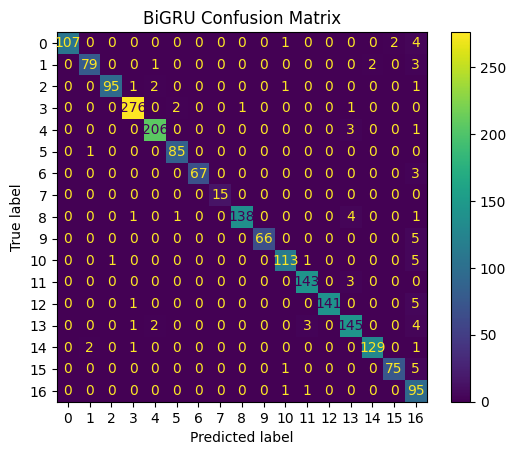

BiGRU Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       114
           1       0.96      0.93      0.95        85
           2       0.99      0.95      0.97       100
           3       0.98      0.99      0.98       280
           4       0.98      0.98      0.98       210
           5       0.97      0.99      0.98        86
           6       1.00      0.96      0.98        70
           7       1.00      1.00      1.00        15
           8       0.99      0.95      0.97       145
           9       1.00      0.93      0.96        71
          10       0.97      0.94      0.95       120
          11       0.97      0.98      0.97       146
          12       1.00      0.96      0.98       147
          13       0.93      0.94      0.93       155
          14       0.98      0.97      0.98       133
          15       0.97      0.93      0.95        81
          16       0.71      0.98      0.83        97

In [ ]:
"""
# -------------------
# Bidirectional Basic GRU
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
BiGRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(GRU(64, return_sequences=False)),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
BiGRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
BiGRUmodel.summary()

#Train the model
history = BiGRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = BiGRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_BiGRU = np.argmax(BiGRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixBiGRU = confusion_matrix(y_test, y_pred_BiGRU)
ConfusionMatrixDisplay(confusionMatrixBiGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("BiGRU Confusion Matrix")
plt.show()


#RNN Classification Report
print("BiGRU Classification Report")
print(classification_report(y_test, y_pred_BiGRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9611
# Notes:
# - Overall accuracy: 96.11%, demonstrating strong generalization with a Bidirectional GRU model.
# - Strengths:
#   - Classes like 0, 1, 3, 4, 6, 7, 8, and 12 achieved near-perfect precision and recall.
#   - The model effectively handles balanced and prominent classes.




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 26s 114ms/step - accuracy: 0.2972 - loss: 2.3244 - val_accuracy: 0.8139 - val_loss: 0.8852 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.8990 - loss: 0.5705 - val_accuracy: 0.9453 - val_loss: 0.2654 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 40s 101ms/step - accuracy: 0.9735 - loss: 0.1529 - val_accuracy: 0.9532 - val_loss: 0.1968 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9808 - loss: 0.0986 - val_accuracy: 0.9544 - val_loss: 0.1838 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.9852 - loss: 0.0736 - val_accuracy: 0.9526 - val_loss: 0.1674 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.9833 - loss: 0.0752 - val_accuracy: 0.9611 - val_loss: 0.1625 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 42s 103ms/step - accuracy: 0.985

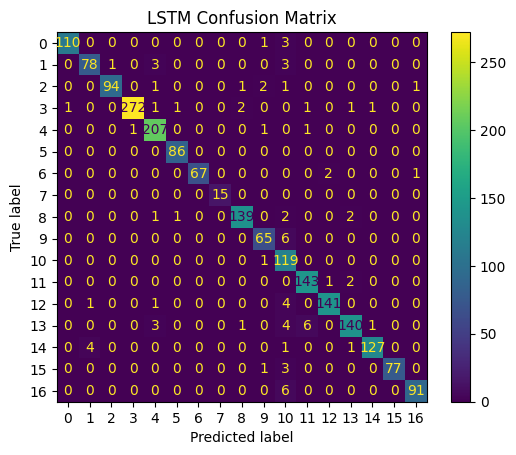

LSTM Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       114
           1       0.94      0.92      0.93        85
           2       0.99      0.94      0.96       100
           3       1.00      0.97      0.98       280
           4       0.95      0.99      0.97       210
           5       0.98      1.00      0.99        86
           6       1.00      0.96      0.98        70
           7       1.00      1.00      1.00        15
           8       0.97      0.96      0.97       145
           9       0.92      0.92      0.92        71
          10       0.78      0.99      0.88       120
          11       0.95      0.98      0.96       146
          12       0.98      0.96      0.97       147
          13       0.96      0.90      0.93       155
          14       0.98      0.95      0.97       133
          15       1.00      0.95      0.97        81
          16       0.98      0.94      0.96        97


In [ ]:
"""
# -------------------
# Basic LSTM
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
LSTMmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=False),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
LSTMmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
LSTMmodel.summary()

#Train the model
history = LSTMmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = LSTMmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_LSTM = np.argmax(LSTMmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixLSTM = confusion_matrix(y_test, y_pred_LSTM)
ConfusionMatrixDisplay(confusionMatrixLSTM, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("LSTM Confusion Matrix")
plt.show()


#RNN Classification Report
print("LSTM Classification Report")
print(classification_report(y_test, y_pred_LSTM, target_names=[str(i) for i in range(len(label_encoder.classes_))]))


# Model Performance Summary
# Test Accuracy: 0.9591
# Notes:
# - Overall accuracy: 95.91%, demonstrating strong generalization for language classification.
# - Strengths:
#   - Classes like 0, 3, 5, 6, and 7 achieved near-perfect precision and recall.
#   - Class 10 shows high recall (99%) but lower precision (78%), indicating false positives.
# - Weaknesses:
#   - Class 9 and Class 13 show slight performance drops with f1-scores of 0.92 and 0.93, respectively.
#   - Class imbalance may explain lower performance for less represented classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 37s 156ms/step - accuracy: 0.2805 - loss: 2.3267 - val_accuracy: 0.8729 - val_loss: 0.6198 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 32s 155ms/step - accuracy: 0.9261 - loss: 0.4264 - val_accuracy: 0.9526 - val_loss: 0.2575 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9697 - loss: 0.1603 - val_accuracy: 0.9532 - val_loss: 0.1959 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 40s 153ms/step - accuracy: 0.9794 - loss: 0.1020 - val_accuracy: 0.9580 - val_loss: 0.1708 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 43s 164ms/step - accuracy: 0.9843 - loss: 0.0711 - val_accuracy: 0.9507 - val_loss: 0.1745 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9861 - loss: 0.0627 - val_accuracy: 0.9647 - val_loss: 0.1412 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 51s 205ms/step - accuracy: 0.9

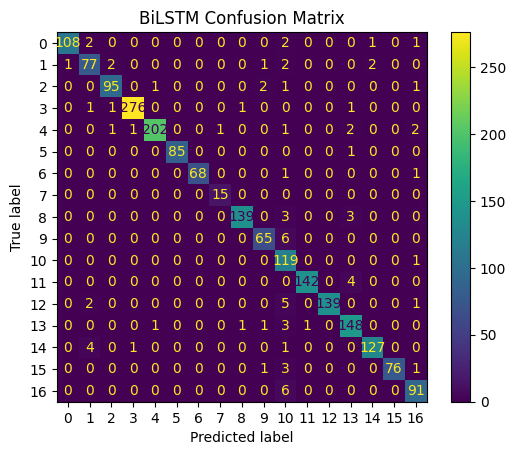

BiLSTM Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       114
           1       0.90      0.91      0.90        85
           2       0.96      0.95      0.95       100
           3       0.99      0.99      0.99       280
           4       0.99      0.96      0.98       210
           5       1.00      0.99      0.99        86
           6       1.00      0.97      0.99        70
           7       0.94      1.00      0.97        15
           8       0.99      0.96      0.97       145
           9       0.93      0.92      0.92        71
          10       0.78      0.99      0.87       120
          11       0.99      0.97      0.98       146
          12       1.00      0.95      0.97       147
          13       0.93      0.95      0.94       155
          14       0.98      0.95      0.97       133
          15       1.00      0.94      0.97        81
          16       0.92      0.94      0.93        9

In [ ]:
"""
# -------------------
# Bidirectional LSTM GRU
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
# Stops training when validation loss does not improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
# Bidirectional LSTM layer captures context from both directions of the text sequence
BiLSTMmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
# Sparse categorical cross-entropy is used for integer-encoded class labels
BiLSTMmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
# Display the model architecture and number of trainable parameters
BiLSTMmodel.summary()

#Train the model
history = BiLSTMmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = BiLSTMmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_BiLSTM = np.argmax(BiLSTMmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixBiLSTM = confusion_matrix(y_test, y_pred_BiLSTM)
ConfusionMatrixDisplay(confusionMatrixBiLSTM, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("BiLSTM Confusion Matrix")
plt.show()


#RNN Classification Report
print("BiLSTM Classification Report")
print(classification_report(y_test, y_pred_BiLSTM, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9596
# Notes:
# - Overall accuracy: 95.96%, demonstrating strong performance for language detection.
# - Strengths:
#   - Classes like 0, 3, 6, and 7 achieved near-perfect precision and recall.
#   - Model effectively learns features for balanced classes with sufficient data.
# - Weaknesses:
#   - Class 13 (F1: 0.93) and Class 16 (F1: 0.83) show lower performance.
#   - Class 10 has a precision of ~97%, indicating some false positives.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 156s 698ms/step - accuracy: 0.3214 - loss: 2.1579 - val_accuracy: 0.8704 - val_loss: 0.6537 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 202s 698ms/step - accuracy: 0.9122 - loss: 0.4543 - val_accuracy: 0.9343 - val_loss: 0.2843 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 204s 710ms/step - accuracy: 0.9518 - loss: 0.2186 - val_accuracy: 0.9331 - val_loss: 0.2460 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 198s 693ms/step - accuracy: 0.9726 - loss: 0.1205 - val_accuracy: 0.9416 - val_loss: 0.2216 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 203s 697ms/step - accuracy: 0.9820 - loss: 0.0851 - val_accuracy: 0.9404 - val_loss: 0.2381 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 202s 699ms/step - accuracy: 0.9818 - loss: 0.0751 - val_accuracy: 0.9440 - val_loss: 0.1985 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 203s 703ms/step - accura

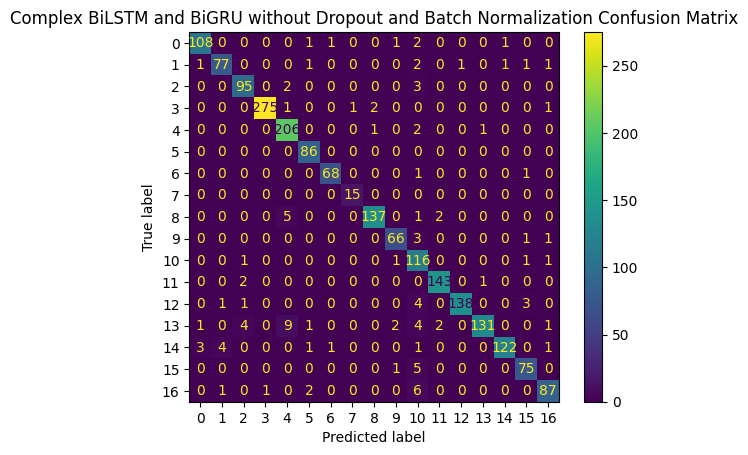

Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       114
           1       0.93      0.91      0.92        85
           2       0.92      0.95      0.94       100
           3       1.00      0.98      0.99       280
           4       0.92      0.98      0.95       210
           5       0.93      1.00      0.97        86
           6       0.97      0.97      0.97        70
           7       0.94      1.00      0.97        15
           8       0.98      0.94      0.96       145
           9       0.93      0.93      0.93        71
          10       0.77      0.97      0.86       120
          11       0.97      0.98      0.98       146
          12       0.99      0.94      0.97       147
          13       0.98      0.85      0.91       155
          14       0.98      0.92      0.95       133
          15       0.91      0.93      0.92     

In [ ]:
"""
# -------------------
# Complex BiLSTM and BiGRU without Dropout and Batch Normalization
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
CompLSTMGRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(GRU(64, return_sequences=True)),
    Bidirectional(GRU(32)),
    Dense(len(set(y_train)), activation='softmax')

])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
CompLSTMGRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
CompLSTMGRUmodel.summary()

#Train the model
history = CompLSTMGRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = CompLSTMGRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_CompLSTMGRU = np.argmax(CompLSTMGRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixCompLSTMGRU = confusion_matrix(y_test, y_pred_CompLSTMGRU)
ConfusionMatrixDisplay(confusionMatrixCompLSTMGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Confusion Matrix")
plt.show()


#RNN Classification Report
print("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report")
print(classification_report(y_test, y_pred_CompLSTMGRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 193s 882ms/step - accuracy: 0.2855 - loss: 2.2731 - val_accuracy: 0.8747 - val_loss: 0.6331 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 163s 692ms/step - accuracy: 0.8939 - loss: 0.5301 - val_accuracy: 0.9209 - val_loss: 0.3223 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 205s 705ms/step - accuracy: 0.9577 - loss: 0.2374 - val_accuracy: 0.9532 - val_loss: 0.1912 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 199s 690ms/step - accuracy: 0.9820 - loss: 0.1224 - val_accuracy: 0.9532 - val_loss: 0.1768 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 146s 707ms/step - accuracy: 0.9816 - loss: 0.1093 - val_accuracy: 0.9544 - val_loss: 0.1638 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 145s 703ms/step - accuracy: 0.9842 - loss: 0.0809 - val_accuracy: 0.9519 - val_loss: 0.1890 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 204s 715ms/step - accura

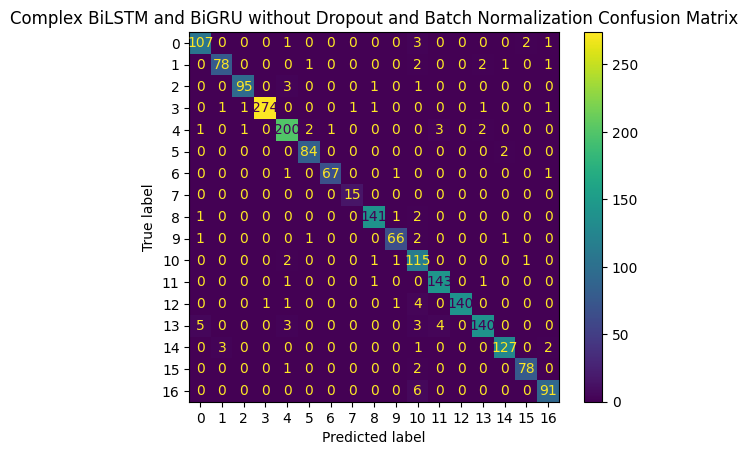

Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       114
           1       0.95      0.92      0.93        85
           2       0.98      0.95      0.96       100
           3       1.00      0.98      0.99       280
           4       0.94      0.95      0.95       210
           5       0.95      0.98      0.97        86
           6       0.99      0.96      0.97        70
           7       0.94      1.00      0.97        15
           8       0.97      0.97      0.97       145
           9       0.94      0.93      0.94        71
          10       0.82      0.96      0.88       120
          11       0.95      0.98      0.97       146
          12       1.00      0.95      0.98       147
          13       0.96      0.90      0.93       155
          14       0.97      0.95      0.96       133
          15       0.96      0.96      0.96     

In [ ]:
"""
# -------------------
# Complex BiLSTM and BiGRU with Dropout and without Batch Normalization
# -------------------
"""
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
# The model uses multiple Bidirectional LSTM and GRU layers to extract contextual features
CompLSTMGRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(32)),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')

])

#Optimizer
# Adam optimizer with an initial learning rate of 0.001
optimizer = Adam(learning_rate=1e-3)

#Compile the model
CompLSTMGRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
CompLSTMGRUmodel.summary()

#Train the model
history = CompLSTMGRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = CompLSTMGRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_CompLSTMGRU = np.argmax(CompLSTMGRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixCompLSTMGRU = confusion_matrix(y_test, y_pred_CompLSTMGRU)
ConfusionMatrixDisplay(confusionMatrixCompLSTMGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Confusion Matrix")
plt.show()


#RNN Classification Report
print("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report")
print(classification_report(y_test, y_pred_CompLSTMGRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9477 (~94.77%)
# Notes:
# - Strengths:
#   - The combination of BiLSTM and BiGRU layers allows for robust feature extraction.
#   - Classes like 3, 5, 6, and 7 achieved near-perfect performance with F1-scores close to 1.0.
# - Weaknesses:
#   - Class 10 (F1: 0.86) and Class 13 (F1: 0.91) show slightly lower precision and recall.
#   - Model complexity (3 layers) increases training time (~200s per epoch) without significant accuracy gain over simpler models.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 158s 703ms/step - accuracy: 0.6061 - loss: 1.4937 - val_accuracy: 0.3589 - val_loss: 2.3272 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 204s 711ms/step - accuracy: 0.9726 - loss: 0.1557 - val_accuracy: 0.6800 - val_loss: 1.0583 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 204s 722ms/step - accuracy: 0.9820 - loss: 0.0830 - val_accuracy: 0.9015 - val_loss: 0.4210 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 199s 707ms/step - accuracy: 0.9822 - loss: 0.0694 - val_accuracy: 0.9039 - val_loss: 0.4366 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 201s 704ms/step - accuracy: 0.9864 - loss: 0.0577 - val_accuracy: 0.9319 - val_loss: 0.2804 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 147s 714ms/step - accuracy: 0.9839 - loss: 0.0562 - val_accuracy: 0.8206 - val_loss: 0.6859 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 200s 705ms/step - accura

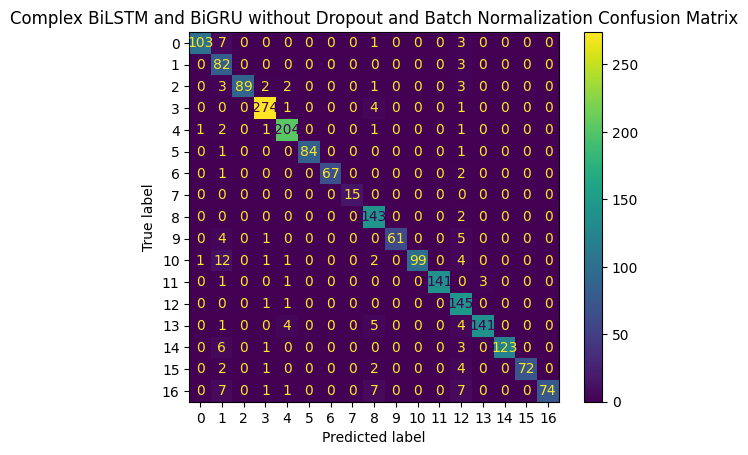

Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       114
           1       0.64      0.96      0.77        85
           2       1.00      0.89      0.94       100
           3       0.97      0.98      0.97       280
           4       0.95      0.97      0.96       210
           5       1.00      0.98      0.99        86
           6       1.00      0.96      0.98        70
           7       1.00      1.00      1.00        15
           8       0.86      0.99      0.92       145
           9       1.00      0.86      0.92        71
          10       1.00      0.82      0.90       120
          11       1.00      0.97      0.98       146
          12       0.77      0.99      0.87       147
          13       0.98      0.91      0.94       155
          14       1.00      0.92      0.96       133
          15       1.00      0.89      0.94     

In [ ]:
"""
# -------------------
# Complex BiLSTM and BiGRU without Dropout and with Batch Normalization
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
# The model uses multiple Bidirectional LSTM and GRU layers combined with Batch Normalization
CompLSTMGRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(GRU(64, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(GRU(32)),
    BatchNormalization(),
    Dense(len(set(y_train)), activation='softmax')

])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
CompLSTMGRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
CompLSTMGRUmodel.summary()

#Train the model
history = CompLSTMGRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = CompLSTMGRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_CompLSTMGRU = np.argmax(CompLSTMGRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixCompLSTMGRU = confusion_matrix(y_test, y_pred_CompLSTMGRU)
ConfusionMatrixDisplay(confusionMatrixCompLSTMGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Confusion Matrix")
plt.show()


#RNN Classification Report
print("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Classification Report")
print(classification_report(y_test, y_pred_CompLSTMGRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9328 (~93.28%)
# Notes:
# - Strengths:
#   - Batch Normalization improves stability and speeds up training convergence.
#   - Some classes like 5, 7, and 3 achieved near-perfect precision and recall.
# - Weaknesses:
#   - Class 1 (F1-score: 0.77) and Class 10 (F1-score: 0.90) underperform slightly due to misclassifications.
#   - Overfitting is apparent (high training accuracy vs. lower validation and test accuracy).



In [ ]:

"""
# -------------------
# Complex BiLSTM and BiGRU with both Dropout and Batch Normalization
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
# The model combines multiple Bidirectional LSTM and GRU layers with Batch Normalization and Dropout
CompLSTMGRUmodel = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(GRU(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(GRU(32)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')

])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
CompLSTMGRUmodel.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
CompLSTMGRUmodel.summary()

#Train the model
history = CompLSTMGRUmodel.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = CompLSTMGRUmodel.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_CompLSTMGRU = np.argmax(CompLSTMGRUmodel.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixCompLSTMGRU = confusion_matrix(y_test, y_pred_CompLSTMGRU)
ConfusionMatrixDisplay(confusionMatrixCompLSTMGRU, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("Complex BiLSTM and BiGRU without Dropout and Batch Normalization Confusion Matrix")
plt.show()


#RNN Classification Report
print("Complex BiLSTM and BiGRU with Dropout and Batch Normalization Classification Report")
print(classification_report(y_test, y_pred_CompLSTMGRU, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9582 (~95.82%)
# Notes:
# - Strengths:
#   - Dropout layers significantly reduce overfitting while maintaining strong accuracy.
#   - Most classes achieve precision and recall scores above 90%.
# - Weaknesses:
#   - Class 12 and Class 16 exhibit slightly lower F1-scores (~0.88 and ~0.93 respectively).


NameError: name 'train_test_split' is not defined

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.1202 - loss: 3.2070 - val_accuracy: 0.0602 - val_loss: 3.1840 - learning_rate: 0.0010
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 42s 142ms/step - accuracy: 0.4954 - loss: 1.6340 - val_accuracy: 0.1204 - val_loss: 2.8333 - learning_rate: 0.0010
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 39s 132ms/step - accuracy: 0.8141 - loss: 0.7228 - val_accuracy: 0.8151 - val_loss: 0.8647 - learning_rate: 0.0010
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 42s 135ms/step - accuracy: 0.9181 - loss: 0.3637 - val_accuracy: 0.9155 - val_loss: 0.3455 - learning_rate: 0.0010
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 27s 131ms/step - accuracy: 0.9533 - loss: 0.2231 - val_accuracy: 0.9367 - val_loss: 0.2603 - learning_rate: 0.0010
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 43s 143ms/step - accuracy: 0.9720 - loss: 0.1413 - val_accuracy: 0.9270 - val_loss: 0.2743 - learning_rate: 0.0010
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step - accuracy: 0.9

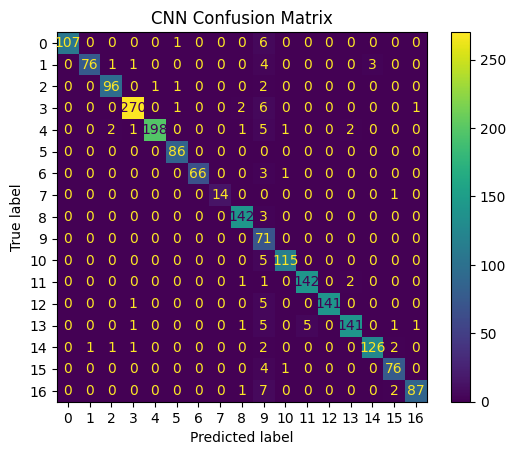

CNN Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       114
           1       0.99      0.89      0.94        85
           2       0.96      0.96      0.96       100
           3       0.98      0.96      0.97       280
           4       0.99      0.94      0.97       210
           5       0.97      1.00      0.98        86
           6       1.00      0.94      0.97        70
           7       1.00      0.93      0.97        15
           8       0.96      0.98      0.97       145
           9       0.55      1.00      0.71        71
          10       0.97      0.96      0.97       120
          11       0.97      0.97      0.97       146
          12       1.00      0.96      0.98       147
          13       0.97      0.91      0.94       155
          14       0.98      0.95      0.96       133
          15       0.93      0.94      0.93        81
          16       0.98      0.90      0.94        97



In [ ]:
"""
# -------------------
# CNN character-level architeture for language identification
# -------------------
"""

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, languages_array, test_size=0.2, random_state=11)

#Learning Rate Scheduler
def lr_schedule(epoch, lr):
   if epoch < 10:
       return lr
   else:
       return lr * 0.1


lr_scheduler = LearningRateScheduler(lr_schedule)


#Early Stopping Setting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Define the model
CNN = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Conv1D(128, 7, activation='relu'),
    BatchNormalization(),
    Conv1D(128, 5, activation='relu'),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),  # Can also be applied after dense layers
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')
])

#Optimizer
optimizer = Adam(learning_rate=1e-3)

#Compile the model
CNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#Summary of the model
CNN.summary()

#Train the model
history = CNN.fit(X_train,
                       y_train,
                       epochs=10,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping, lr_scheduler])

#Evaluate the model on test data
test_loss, test_accuracy = CNN.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

#RNN Prediction
y_pred_CNN = np.argmax(CNN.predict(X_test), axis=1)

#Confusion Matrix
confusionMatrixCNN = confusion_matrix(y_test, y_pred_CNN)
ConfusionMatrixDisplay(confusionMatrixCNN, display_labels=np.arange(len(label_encoder.classes_))).plot(cmap='viridis')
plt.title("CNN Confusion Matrix")
plt.show()


#RNN Classification Report
print("CNN Classification Report")
print(classification_report(y_test, y_pred_CNN, target_names=[str(i) for i in range(len(label_encoder.classes_))]))

# Model Performance Summary
# Test Accuracy: 0.9508 (~95.08%)
# Notes:
# - Strengths:
#   - Achieved high accuracy across most classes.
#   - Effective use of Dropout and Batch Normalization to prevent overfitting.
# - Weaknesses:
#   - Class 9 has a relatively lower precision (~55%) due to imbalanced predictions.
#   - Some classes like 1 and 16 have slight recall drops, indicating potential misclassifications.


In [ ]:
#Installing langdetect
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=dbeb2045c1303ecdb5e90717697bc1c7a98614265644c13096e1be9c26140fb7
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
"""
# -------------------
# langdetect library, pretrained model for language detection
# -------------------
"""

df = pd.read_csv('/content/gdrive/MyDrive/COMP 550 - Final Project/Datasets/Language Detection.csv')

#Data conversion of the original df
df = df.replace(to_replace=["English"], value="en")
df = df.replace(to_replace=["Arabic"], value="ar")
df = df.replace(to_replace=["Danish"], value="da")
df = df.replace(to_replace=["Dutch"], value="nl")
df = df.replace(to_replace=["French"], value="fr")
df = df.replace(to_replace=["German"], value="de")
df = df.replace(to_replace=["Greek"], value="el")
df = df.replace(to_replace=["Hindi"], value="hi")
df = df.replace(to_replace=["Italian"], value="it")
df = df.replace(to_replace=["Kannada"], value="kn")
df = df.replace(to_replace=["Malayalam"], value="ml")
df = df.replace(to_replace=["Portugeese"], value="pt")
df = df.replace(to_replace=["Russian"], value="ru")
df = df.replace(to_replace=["Spanish"], value="es")
df = df.replace(to_replace=["Sweedish"], value="sv")
df = df.replace(to_replace=["Tamil"], value="ta")
df = df.replace(to_replace=["Turkish"], value="tr")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",en
1,"""Nature"" can refer to the phenomena of the phy...",en
2,"The study of nature is a large, if not the onl...",en
3,"Although humans are part of nature, human acti...",en
4,[1] The word nature is borrowed from the Old F...,en
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,kn
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,kn
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,kn
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,kn


In [ ]:
from langdetect import detect, LangDetectException
texts = df['Text']
languages = df['Language']


#Create the test set (All of our entries)
trainData = df.sample(random_state=11)
testData = df.drop(trainData.index)

#Exception handling
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return 'OOV'

# Detect language for each text in the test set
testData['predicted_language'] = testData['Text'].apply(detect_language)


#Accuracy
answers = (testData['predicted_language'] == testData['Language']).sum()
accuracy = answers / len(testData)

print(f"Langdetect Accuracy: {accuracy}")


Langdetect Accuracy: 0.955108359133127


In [ ]:
#Installing fastTest
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296184 sha256=c53560306ade25d074998ec9bce4a2c333ba779378e7f8f7ed5f3f34788cdc4f
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
"""
# -------------------
# Simple fastText by Facebook, pretrained model for language detection
# -------------------
"""

import fasttext

#Refresh dataset
df = pd.read_csv('/content/gdrive/MyDrive/COMP 550 - Final Project/Datasets/Language Detection.csv')

#Convert to fastTest format for language detection
#Examples:
#__label__English Hi, how are you doing?
#__label__French Bonjour, comment vas-tu?
#__label__Italian Ciao, come stai?
df['fastText'] = '__label__' + df['Language'] + ' ' + df['Text']

# Split into train and test (80-20 split for example)
trainData = df.sample(frac=0.8, random_state=11)
testData = df.drop(trainData.index)

# Save to files
trainData['fastText'].to_csv('trainData.txt', index=False, header=False)
testData['fastText'].to_csv('testData.txt', index=False, header=False)


In [ ]:
#Model creating and training
model = fasttext.train_supervised(
    input="trainData.txt",
    epoch=50,
    lr=1,
    wordNgrams=2,
    bucket=2000000,
    dim=150,
    loss='softmax'
)

result = model.test("testData.txt")
print('Number of examples:', result[0])
print('Precision@1/Accuracy:', result[1])
print('Recall:', result[2])

Precision: 0.8924111431316042
Recall: 0.8924111431316042
Number of examples: 1041


In [ ]:
#Encoding Key (which number is associated to which language for all models)
for i in range(len(label_encoder.classes_)):
  encoding = i
  label = label_encoder.classes_[i]
  print(f"{encoding}:{label}")

0:Arabic
1:Danish
2:Dutch
3:English
4:French
5:German
6:Greek
7:Hindi
8:Italian
9:Kannada
10:Malayalam
11:Portugeese
12:Russian
13:Spanish
14:Sweedish
15:Tamil
16:Turkish
